# タイタニックデータサイエンスソリューション

### 私は、このノートブックで使われているテクニックを直感的で強力で生産的なAPIにまとめた新しいPythonパッケージ[Speedml]（https://speedml.com）　をリリースしました。

### Speedmlは、Kaggleリーダーボードの80％の低さから数回の反復で20％の高さにジャンプするのに役立ちます。

### もう一つ... Speedmlはコードの行数を約70％削減を実現しています！

### Speedmlを使って[Titanic Solution]（https://github.com/Speedml/notebooks/blob/master/titanic/titanic-solution-using-speedml.ipynb） を実行してダウンロードしてください。

このノートブックは、[Data Science Solutions]（https://www.amazon.com/Data-Science-Solutions-Startup-Workflow/dp/1520545312） の友です。ノートブックはKaggleのようなサイトでデータサイエンス大会を解決する典型的なワークフローを一通り説明しています。

データサイエンスコンテストにエントリーするために勉強する優れたノートブックがいくつかあります。しかし、これらのノートブックは専門家のために専門によって開発されているため、ソリューションがどのように開発されているかについての説明の一部をスキップしてします。このノートブックの目的は、段階的なワークフローに従い、ソリューション開発中に行うすべての決定についての各ステップとその根拠を説明することです。


## ワークフローの段階

コンペのソリューションのワークフローは、Data Science Solutionsの書籍で説明されている7つの段階を経ています。

1.質問または問題の定義。
2.訓練および試験データを取得する。
3.データをまとめる、準備する、クリーニングする。
4.分析し、パターンを特定し、データを探索する。
5.問題をモデル化し、予測し、解決する。
6.問題解決のステップと最終的な解決方法を視覚化し、報告し、提示する。
7.結果を提供または提出する。

ワークフローは、各ステージがどのステージに沿っているかを示す一般的な流れを示します。
ただし、例外を持つユースケースがあります。

- 複数のワークフローステージを組み合わせることができます。私たちはデータを可視化することで分析することができます。  
- 支持されたよりもステージを早く行う。私たちはラングリングの前後でデータを分析するかもしれない。
- ワークフローで何度もステージを実行します。視覚化ステージは複数回使用できます。
- ステージを全部落とす。コンペのために私たちのデータセットを有効にするためには、製品化やサービスのための供給段階は必要ないかもしれません。

## 質問と問題の定義

Kaggleのようなコンペのサイトでは、解決すべき問題や質問する項目を定義し、データサイエンスモデルを訓練するためのデータセットを提供し、テストデータセットに対してモデル結果をテストします。タイタニック生存コンペの質問または問題の定義は、[Kaggle（https://www.kaggle.com/c/titanic）　でここに記述されています。

>タイタニックの災害で生還または亡くなった乗客を列挙したトレーニングセットを知っていれば、テストデータセット内の乗客が生存しているかどうかにかかわらず、我々のモデルは生存情報を含まない与えられたテストデータセットに基づいて決定できます。

私たちはまた、問題の領域について早期に理解を深めたいと思うかもしれません。

これは[Kaggle competition description page here]（https://www.kaggle.com/c/titanic）　に記載されています。ここで注目すべきハイライトです。

- 1912年4月15日に、タイタニック号は処女航海中に氷山衝突後に沈み、2224人の乗客と乗組員のうち1502人が死亡した。 生存率は32％。
- 難破船がこのような人命喪失に繋がった原因の1つは、乗客と乗組員のための救命艇が足りなかったということです。
- 沈没を生き延びるためにはいつくかの運の要素があったが、女性、子供、上流層のようなグループが他の人々よりも生き残る可能性が高かった。

## ワークフローの目標

データサイエンスのソリューションのワークフローは、7つの主要な目標を解決します。

**　分類化 **　我々はサンプルを分類したり、カテゴリーに分けたいかもしれない。ソリューションのゴールに沿って様々なクラスの関連性や相関性を理解したい場合もあります。

**　相関　** トレーニングデータセット内の利用可能な機能に基づいて問題に近づくことができます。データセットのどの特徴がソリューションの目標に大きく貢献しているのか？　統計的に言えば、特徴とソリューションの目標の間には[相関]（https://en.wikiversity.org/wiki/Correlation）　があるのか？特徴値が変化するに連れてソリューションの状態も変化するが、その逆もあるのか？これはあたえられたデータセットの数値的特徴とカテゴリーの特徴の両方をテストすることができます。また、その後の目標やワークフローの段階で、生存以外の特徴の中で相関を判断したいかもしれません。特定の機能を関連付けることは、機能の作成、完了、または修正に役立ちます。

**　変換する　**　モデリング段階では、データを準備する必要があります。モデルアルゴリズムの選択に応じて、すべての特徴を数値同等の値に変換する必要があるかもしれない。たとえば、テキストのカテゴリ値を数値に変換する場合です。

**　完了。**　データの準備では、フィーチャ内の欠損値を見積もる必要があります。 モデルアルゴリズムは、欠損値がない場合に最高のパフォーマンスを発揮する。

**　修正　**　我々はまた、与えられた訓練データセットを、特徴内のエラーまたは不正確であろう値について分析し、これらの値を是正するか、またはエラーを含むサンプルを除外することができる。 これを行う1つの方法は、サンプルまたは特徴の間で外れ値を検出することです。 分析に貢献していなかったり、または結果に著しい歪みが生じている場合、特徴を完全に破棄することもあります。

**　作成　**　既存の特徴または一連の特徴に基づき、相関、変換、完全性の目標に従うように新しい特徴を作成することができます。

**　チャート作成　**　データの性質とソリューション目標に応じて、適切な視覚化プロットとチャートを選択する方法。

## リファクタリング リリース　2017-Jan-29

（a）読者からのコメント、（b）Jupyterカーネル（2.7）からKaggleカーネル（3.5）へのノートブックの移植、および（c）ベストな演習用カーネルの数少ないレビューに基づいて、ノートブックを大幅にリファクタリングしています。

### ユーザーのコメント
- データセット間でタイトルを数値に変換するなど、特定の操作についてトレーニングとテストのデータを組み合わせる。 （ありがとう@Sharan Naribole）

- 正確な観察 約30％近くの乗客が兄弟および/または配偶者を乗せていた。 （ありがとう@Reinhard）
- ロジスティック回帰係数を正しく解釈する。 （ありがとう@Reinhard）
- プロットの寸法を指定し、凡例をプロットに表示します。

###   ベストプラクティス

- プロジェクトの早い段階で特徴相関分析を実行する。
- 可読性のためにオーバーレイの代わりに複数のプロットを使用する。

### 下記のカーネルは各種ライブラリーをインポートしています。

In [74]:
# データ分析とデータラングリング
import pandas as pd
import numpy as np
import random as rnd

# 可視化
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 機械学習
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## データを取得する

Python Pandasパッケージは、私たちのデータセットで作業するのに役立ちます。 まず、Pandas DataFramesの中に学習データセットとテストデータセットを取得します。 また、これらのデータセットを組み合わせて、両方のデータセットで特定の操作を実行します。

In [75]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
combine = [train_df, test_df]

## データを記述して解析する

Pandasはまた、プロジェクトの早い段階で質問に答えるデータセットを記述するのに役立ちます。

**どの特徴がデータセットで利用可能ですか？**

これらを直接操作または分析するための特徴名に注目してください。 これらの機能名は、[Kaggle data page here]（https://www.kaggle.com/c/titanic/data）　に記載されています。

### 下記のカーネルはデータセットのカラム名を表示している。

In [76]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**どの特徴がカテゴリになっていますか？**

これらの値は、サンプルを同様のサンプルのセットに分類する。 カテゴリフィーチャには、公称、序数、比率、または間隔に基づく値があります。 とりわけ、これは視覚化に適したプロットを選択するのに役立ちます。

- カテゴリ：Survived, Sex, および Embarked。 序数：Pclass。

**どの機能が数値ですか？**

どの機能が数値ですか？ これらの値はサンプルごとに変化します。 数値フィーチャ内に離散、連続、または時系列の値がありますか？ とりわけ、これは視覚化に適したプロットを選択するのに役立ちます。

- 連続：Age, Fare. 離散: SibSp, Parch.

 ### 下記のカーネルはデータセットの最初の５行データを表示。¶

In [77]:
# データをプレヴューする
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**どの特徴が混合データイプですか？**

同じ特徴内の数値、英数字データ。 これらは目標を修正するための候補です。

- チケットは、数字と英数字のデータタイプが混在しています。 キャビンは英数字です。

**どの特徴にエラーや誤植が含まれているいるでしょうか？**

大規模なデータセットを検討するのは難しいですが、小さなデータセットからいくつかのサンプルを見直すと、修正が必要な特徴があることがわかります。

- 名前の特徴には、タイトルや丸括弧、代替名や短縮名に使用される引用符など、名前を記述するためのいくつかの方法があるため、エラーや誤字が含まれることがあります。

### 下記のカーネルはデータセットの最後の５つの行データを表示。

In [78]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**どの機能に空白、null値または空の値が含まれていますか？**

これらは修正が必要です。

- Cabin> Age> Embarked の特徴には、トレーニングデータセットの順序でいくつかのヌル値が含まれています。
- Cabin>Age はデータセットの場合、不完全です。

**さまざまな特徴のデータタイプは何ですか？**

目標の転換中に私たちを助けてください。

- 7つの特徴は、整数または浮動小数点数です。 テストデータセットの場合は6つ。
- 5つの機能は文字列（オブジェクト）です。

### 下記のカーネルはtrain_dfとtest_dfの各特徴の有効データ数、null値の数、データ型、メモリ使用量などの総合的な情報を表示している。

In [79]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

**サンプル全体の数値的特徴値の分布は何ですか？**

これは、他の初期の洞察の中でも、実際の問題領域のトレーニングデータセットがどのように代表的であるかを判断するのに役立ちます。

- サンプルの合計は、タイタニック号（2,224）に搭乗した乗客の実際の数の891または40％です。
- 0または1の値を持つカテゴリ的な特徴が生存者です。
- 約38％のサンプルの生存者が実際の生存率の32％を代表している。
- ほとんどの乗客（> 75％）は親または子供と一緒に旅行しなかった。
- 乗客のほぼ30％が兄弟姉妹や配偶者を乗せていました。
- 運賃は、わずかの乗客数（1％未満）場合は高くて512ドルと大幅な変動があります。
- 65歳から80歳までの高齢者（<1％） はほとんどいません。

### 下記のカーネルはtrain_df の各columnのデータ数、平均、分散などの統計量を表示しています。

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

In [80]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**カテゴリの特徴分布は何ですか？**

- 'Name'はデータセット全体で一意です（count = unique = 891）
- 2つ値を取ることが可能な'Sex'変数のうち、65％が男性（top=男性、頻度= 577 /カウント= 891）
- 'Cabin'変数はサンプル全体でいくつか重なっています。あるいは、複数の乗客が客室を共有しました。
- 'Embarked'は3つ値を取ることが可能です。 ほとんどの乗客がS港（top = S）を使用しています。
-  'Ticket'の特徴は重複値が（ユニーク= 681）の割合（22％）が高い。

### 下記のカーネルはデータセットの文字列データを持つカラムのデータを集計している。

In [81]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kraeff, Mr. Theodor",male,347082,G6,S
freq,1,577,7,4,644


### データ解析に基づく仮定

これまでに行われたデータ分析に基づいて、以下の仮定にたどり着きました。適切な措置を取る前に、これらの仮定条件をさらに検証することがあります。

**相関関係**

私たちは、各特徴が'Survival'とどれくらいよく相関しているかを知りたいと思っています。プロジェクトの早い段階でこの作業を行い、プロジェクトの後半でモデル化された相関関係とこれらのクイック相関関係を一致させたいと考えています。

**完了。**

1. 生存と明らかに相関があるため、 'Age'特徴を完成させたいかもしれません。
2. 生存者や他の重要な特徴と相関する可能性があるため、'Embarked'特徴を完成させたい場合があります。

**修正する。**

1. 'Ticket'特徴は重複率（22％）が高く、'Ticket'と生存者の間に相関がない可能性があるため、分析から除外されるかもしれません。
2. 'Cabin'特徴は、トレーニングデータとテストデータセットの両方で非常に不完全であるか、または多くのnull値を含んでいるため、削除される可能性があります。
3. 'PassengerId'は生存者に寄与しないため、トレーニングデータセットから削除されることがあります。
4. 'Name'特徴は比較的非標準であり、生存に直接貢献しない可能性があるため、削除されるでしょう。

**作成。**

1. 乗船した家族の総数を取得するため、'Parch'と'SibSp'に基づいて'Family'という新しい特徴を作成したいかもしれません。
2. 'Name'特徴を使用して、新しい特徴としてTitle'を抽出しようと企むかもしれません。
3. 'Age'バンドの新しい機能を作成したい場合があります。これは、連続的な数値的特徴を序数的カテゴリー的特徴に変えるものです。
4. 分析に役立つ場合は、 'Fare'の範囲の特徴を作成することもできます。

**分類。**

また、前に述べた問題の記述に基づいて、私たちの仮定に追加することもあります。

1. 女性（性別=女性）は生存していた可能性が高い。
2. 子供（年齢<？）は生存していた可能性が高い。
3. 上位クラスの乗客（Pclass = 1）は生き残った可能性が高い。

## ピボット機能による解析

私たちの観測と仮定の一部を確認するために、フィーチャの相互関係を素早く相互にピボットすることで、フィーチャの相関関係を素早く分析できます。 この段階では空の値を持たない特徴に対してのみ行うことができます。 また、カテゴリ（性別）、順序（Pclass）または離散（SibSp、Parch）型の機能に対してのみ、そうすることが理にかなっています。

- ** Pclass ** Pclass = 1とSurvived（分類＃3）の間に有意な相関（> 0.5）が観察される。 この機能をモデルに含めることに決定します。
- **性別**性別=女性の生存率が74％（分類＃1）と非常に高いという問題の定義中における観察を確認する。
- ** SibSpとParch **これらの特徴は、特定の値に対してゼロ相関を有する。 これらの個々の特徴から1つの特徴または特徴のセットを導出することが最善の方法です（＃1を作成する）。


 ### 下記のカーネルはtrain_dfをカラム'Pclass'と'Survived'でしぼり、'Pclass'で集計後平均値を出して、'Survived'を降順でソートし表示しています。

In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


乗船クラスによって生存率が大きく変化していることがわかり、Pclassと生存率の相関が浮き彫りになっています。

 ### 下記のカーネルはtrain_dfをカラム"Sex"と"Survived"でしぼり、'Sex'で集計後平均値を出し、'Survived'を降順でソートし生存率を性別ごとに表示しています。

In [11]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


性別によって生存率に大きな違いがわかり、生存率との相関が浮き彫りになっています。

 ### 下記のカーネルは'SibSp'で集計し平均値を出して、'Survived'の値の降順でソートし表示しています。

In [12]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


 ### 下記のカーネルは'Parchで集計し平均値を出して、'Survived'の値の降順でソートし表示しています。

In [13]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## データを視覚化して解析する

今度は、データ分析のために視覚化を使用して、いくつかの前提を続けｔ確認することができます。

### 数値特徴の相関

数値の特徴とわれわれのソリューションの目標（Survived）との相関を理解することから始めましょう。

ヒストグラムチャートは、バンドや範囲で有用なパターンを特定するのに役立つAgeのような連続的な数値変数を分析するのに便利です。ヒストグラムは、自動的に定義されたビンまたは等間隔のバンドを使用したサンプルの分布を示すことができます。これは、特定のバンドに関する質問に答えるのに役立ちます（幼児の生存率はより良いですか？）
ヒストグラム視覚化におけるx軸は、サンプルまたは乗客の数を表すことに注意してください。

**観察。**

- 幼児（年齢= 4歳）は高い生存率を示した。
- 最も古い乗客（年齢= 80）が生き残った。
- 15-25歳の多数が生き残れなかった。
- ほとんどの乗客は15-35歳の範囲にあります。

**決定。**

この単純な分析により、後続のワークフローステージの決定として、我々の仮定が確認されます。

- 私たちはモデルトレーニングで年齢（私たちの仮定の分類＃２）を考慮する必要があります。
- null値の'Age'特徴を完了する（＃1を完了する）。
- 私たちは年齢層を縛るべきです（＃3を作る）。



### 下記のカーネルは'Survived'の0と1での年齢をx軸にもつヒストグラムを、FacetGridで左右に並べて表示しています。

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html


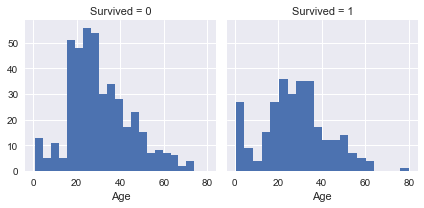

In [14]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Survivedの0と1で生存率の高い年齢層の違いが一目瞭然です。

### 数字と序数の特徴の相関

1つのプロットを使用して相関を識別する複数の機能を組み合わせることができます。 これは、数値を持つ数値的および類型的な特徴を用いて行うことができる。

**観察。**

- ほとんどの乗客はPclass = 3だったが、ほとんどは生き残れなかった。 私たちの分類の仮定＃2を確認。
- Pclass = 2およびPclass = 3の幼児の乗客はほとんどが生き残った。 さらに、我々の分類した仮定＃2を満たす。
- Pclass = 1のほとんどの乗客は生き残った。 私たちの分類の仮定＃3を確認。
- Pclassは、乗客の年齢分布によって異なります。

**決定。**

- モデルトレーニングのためにPclassを検討してください。

### 下記のカーネルはPclassごとにSurvived値の0と1で場合分けした、x軸に Ageをもつヒストグラムを作成しています。

FacetGrid():https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

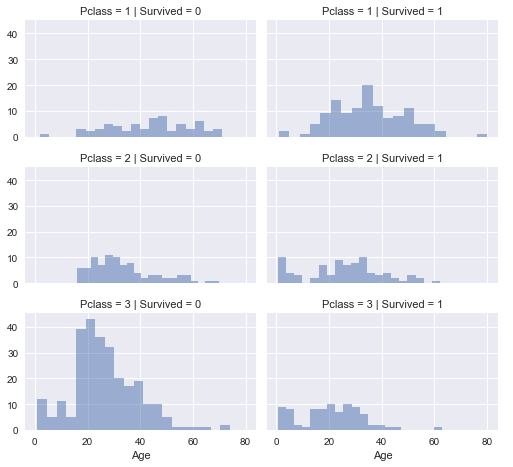

In [15]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Pclass３の死亡率が突出して高く、Pclass1の生存率が高いことがわかる。SurvivedとPclassの相関が明らか。

### カテゴリ特徴の相関

これで、カテゴリの特徴とソリューションの目標を関連付けることができます。

**観察。**

- 女性の乗客は男性よりもはるかに良い生存率を示している。 分類を確認（＃1）。
- 男性の生存率が高いEmbarked = Cは例外。 これは、PclassとEmbarkedとの間の相関性であり、そして順番にPclass と Survivedであり、必ずしもEmbarkedとSurvivedの間の直接的な相関関係ではない。
- CおよびQ港でPclass = 2と比較した場合、男性はPclass = 3でより良好な生存率を示した。 完了（＃2）。
- 乗船港によって、Pclass = 3および男性乗客の生存率が異なる。 相関（＃1）。

**決定。**

- モデルトレーニングに 'Sex'特徴を追加する。
- モデルトレーニングに'Embarked'特徴を完成し追加します。

### 下記のカーネルは男女の生存率の折れ線グラフをEmbarkedごとに作成している。Survivedをy軸にPclassをx軸に設定している。

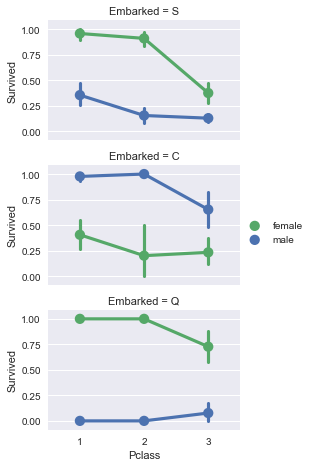

In [16]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### カテゴリと数値の相関

また、（数値以外の値を持つ）カテゴリ特徴と数値特徴を関連付けたいかもしれません。 私たちは、生存（カテゴリー別数値）とEmbarked （カテゴリー別非数値）、Sex（カテゴリー別非数値）、Fare（数値連続）との相関を考慮することができます。

**観察。**

- より高い運賃を支払った乗客はより多く生存しています。 運賃の範囲（＃4）を作成するという仮定を確認。
- 乗船港は生存率と相関する。 相関（＃1）と完了（＃2）を確認。

**決定。**

- Fare特徴の帯を検討してください。

### 下記のカーネルは生存者が運賃の額と乗船港に相関していることを示すヒストグラムを作成している。各図はEmbarkedとSurvivedの各値ごとに分類。Fareをy軸にSexをx軸に設定している。

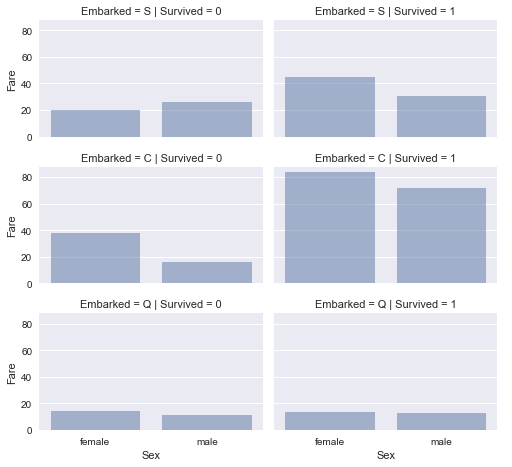

In [17]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

C港から乗船者の生存者が支払った運賃が他港からの生存者より高額である。富裕層ほど生存率が高いことがうかがえる。

## ワングルデータ

私たちは、データセットとソリューションの要件に関するいくつかの仮定と決定を収集しました。 これまでは、単一の特徴や価値を変更してこれらに到達する必要はありませんでした。 目標を修正、作成、完了するための決定と前提を実行しましょう。

### 特徴を削除することで修正する

これは実行するための良い目標に向かうスタートです。 特徴を削除することで、データポイントの数が減少します。 私たちのノートブックをスピードアップし、分析を楽にします。

私たちの前提と決定に基づいて、Cabin（＃2を修正する）とTicket（＃1を修正する）特徴を削除したいと考えています。

該当する場合は、一貫性を保つため、トレーニングとテストの両データセットで操作を実行します。

### 下記のカーネルはtrain_dfとtest_dfから'Cabin'と'Ticket'のデータを削除し処理の前後のサイズを表示して比較している。



In [18]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

### 既存のものから新しい特徴抽出を作成する

私たちはName特徴をNameとPassengerId特徴を削除する前に、タイトルを抽出し、タイトルと生存の相関関係をテストするように設計できるかどうかを分析したい。

次のコードでは、正規表現を使用してTitle特徴を抽出します。 RegEx型'（\w+\.）'は、Name特徴内のドット文字で終わる最初の単語と一致します。 'expand = False' フラグはDataFrameを返します。

**観察。**

Title、Age、およびSurvivedをプロットすると、次のような観察に留意します。

- ほとんどのタイトルはAgeグループを正確に縛ります。例：マスタータイトルのAgeは平均5年です。
- Title　Age帯の間のSurvivalはわずかに異なります。
- 一部のタイトルはほとんどが生き残った（Mme、Lady、Sir）か、しなかった（Don、Rev、Jonkheer）。


**決定。**

- モデルトレーニングのために新しいTitle特徴を保持することに決めました。

### 下記のカーネルはA 〜 Z またはa 〜 zが一回以上現れる文字列をName特徴から抽出しデータフレームで、'Title'と'Sex'でクロス集計している。

extract: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.extract.html
crosstab: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html

In [19]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


多くのタイトルをより一般的な名前に置き換えることも、「希少なもの」として分類することもできます。

### 下記のカーネルは' Title'特徴内の'Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'を'Rare'で置き換えています。同様に'Mlle'を'Miss'に,'Ms'を 'Miss'に、そして'Mme'を'Mrs'に置き換え、'Master'を入れた５つの'Title'ごとに'Survived'を集計してデータフレームで表示しています。


In [20]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


カテゴリタイトルを序数に変換することができます。

### 下記のカーネルは上図の５つの'Title' ごとに序数を割り振り辞書配列に格納し、メソッドmap()で数値に置換しています。メソッドfillna(0)欠損値に0を代入して置き換えています。

map():https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html
fillna():https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

In [21]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


これで、トレーニングとテストのデータセットからName特徴を安全に削除できます。 また、トレーニングデータセットにPassengerId特徴は必要ありません。

### 下記のカーネルはtrain_dfから'Name'と'PassengerId'特徴を、test_dfから'Name'特徴を削除してそれぞれ更新しています。


In [22]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### カテゴリ特徴の変換

文字列を含む特徴を数値に変換できるようになりました。 これは、ほとんどのモデルアルゴリズムで必要です。 そうすることで、特徴の達成目標を達成するのにも役立ちます。

 'Sex'特徴を、女性= 1、男性= 0の性別という新しい特徴に変換することから始めましょう。

### 下記のカーネルはデータセットの'Sex'特徴のfemale'と'male'をそれぞれ'1''0'のint型に置き換えて確認しています。

In [23]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 数値連続的特徴を完成する

今度は、欠損値またはnull値を持つ特徴の見積もりと完成を開始すべきです。まず、'Age'特徴のためにこれを行います。

我々は、数値連続的特徴を完成させる3つの方法を検討することができる。

1.簡単な方法は、平均と[標準偏差]（https://en.wikipedia.org/wiki/Standard_deviation）　の間に乱数を生成することです。

欠損値を推測するより正確な方法は、他の相関特徴を使用することです。我々のケースでは、Age、Sex、およびPclassの間の相関に注意する。 PclassとGender特徴の組み合わせのセット全体でAgeの[median]（https://en.wikipedia.org/wiki/Median） 値を使用してAgeの値を推測します。したがって、Pclass = 1、Gender = 0、Pclass = 1、Gender = 1などの中間年齢など

3.方法1と2を組み合わせる。そのため、中央値に基づいて年齢値を推測する代わりに、PclassとGenderの組み合わせのセットに基づいて平均と標準偏差の間の乱数を使用する。

方法1と3はランダムノイズを我々のモデルに導入する。複数回の実行結果が異なる可能性があります。方法2を優先するでしょう。

### 下記のカーネルはPclassとSexの0と1とで分類し、Ageをx軸にもつヒストグラムを表示している。

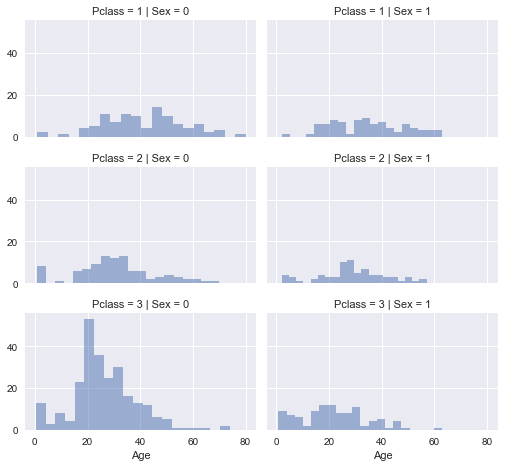

In [24]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Pclass x Genderの組み合わせに基づいて推測されたAge値を含む空の配列を準備することから始めましょう。

In [25]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

今度は、Sex（0または1）とPclass（1,2,3）を繰り返し、6つの組み合わせのAgeの推測値を計算します。

In [26]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


AgeBandを作成し、Survivedとの相関を測定しましょう。

### 下記のカーネルは'Age'特徴を５つの階層に分けて新たに作成した'AgeBand'特徴に格納し、'AgeBand'の各階層の'Survived'を算出しデータフレームを表示しています。

pd.cut(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html

In [27]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16]",0.550000
1,"(16, 32]",0.337374
2,"(32, 48]",0.412037
3,"(48, 64]",0.434783
4,"(64, 80]",0.090909


これらの帯に基づいて年齢を序数に置き換えましょう。

### 下記のカーネルは各データセットの'Age'特徴の64以下の各階層に序数を割り振り、それ以上の場合は数値通り表示するように設定しています。

In [31]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,0,1,0,7.2500,S,1,"(16, 32]"
1,1,1,1,0,1,0,71.2833,C,3,"(32, 48]"
2,1,3,1,0,0,0,7.9250,S,2,"(16, 32]"
3,1,1,1,0,1,0,53.1000,S,3,"(32, 48]"
4,0,3,0,0,0,0,8.0500,S,1,"(32, 48]"


AgeBand特徴を削除することはできません。

### 下記のカーネルはデータセットから'AgeBand'特徴を削除しています。

In [32]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,0,1,0,7.2500,S,1
1,1,1,1,0,1,0,71.2833,C,3
2,1,3,1,0,0,0,7.9250,S,2
3,1,1,1,0,1,0,53.1000,S,3
4,0,3,0,0,0,0,8.0500,S,1


##### 既存の特徴を組み合わせて新しい特徴を作成する

ParchとSibSpを組み合わせたFamilySizeの新しい特徴を作成できます。 これにより、データセットからParchとSibSpを削除することができます。

### 下記のカーネルはParchとSibSpを組み合わせたFamilySizeを作成しています。その上でFamilySizeでSurvivedを集計し平均値を出して降順でデータフレームで表示しています。

In [42]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


IsAloneという別の特徴を作成することができます。

### 下記のカーネルは各データセットの'FamilySize'が１の場合は

In [43]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Parch、SibSp、およびFamilySize特徴をIsAlone譲りましょう。

### 下記のカーネルは各データセットの'Parch', 'SibSp', 'FamilySize'を削除しそれぞれ更新している。

In [44]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,0,7.2500,S,1,0
1,1,1,1,0,71.2833,C,3,0
2,1,3,1,0,7.9250,S,2,1
3,1,1,1,0,53.1000,S,3,0
4,0,3,0,0,8.0500,S,1,1


PclassとAgeを組み合わせた人工的な特徴を作成することもできます。

### 下記のカーネルは各データセットの'Age'と'Pclass'をかけた値を新しく作成した'Age*Class'に格納しそれら三つの特徴を表示しています。

In [45]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,0,0,3
1,0,0,1
2,0,0,3
3,0,0,1
4,0,0,3
5,0,0,3
6,0,0,1
7,0,0,3
8,0,0,3
9,0,0,2


### カテゴリ特徴を完成する

Embarked特徴は、乗船港に基づいてS、Q、Cの値を取る。 トレーニングデータセットには2つの欠損値があります。 これらに最も一般的な出現内容で記入するだけです。

### 下記のカーネルはtrain_dfのEmbarked特徴の欠損値の行を削除しインデックス０の値を表示しています。

mode():https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html

In [46]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [47]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### カテゴリ特徴を数値に変換する

新しい数値Port特徴を作成することで、EmbarkedFill特徴を変換できるようになりました。

In [48]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,0,7.2500,0,1,0,0
1,1,1,1,0,71.2833,1,3,0,0
2,1,3,1,0,7.9250,0,2,1,0
3,1,1,1,0,53.1000,0,3,0,0
4,0,3,0,0,8.0500,0,1,1,0


### クイックコンプリートと数値特徴の変換

Fare特徴で最も頻繁に発生する値を取得するために、モードを使用するテストデータセットで単一の欠損値の場合のFare特徴を完成させることができます。 これは1行のコードで行います。

単一の値だけを置き換えているので、中間の新しい特徴を作成したり、不足している特徴を推測するための相関分析を行ったりしていないことに注意してください。 完成目標は、モデルアルゴリズムが非null値で動作するための望ましい要件を達成することです。

運賃が通貨を表しているので、小数点第二以下に四捨五入したい場合もあります。

In [49]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,0,7.8292,2,1,1,0
1,893,3,1,0,7.0000,0,3,0,0
2,894,2,0,0,9.6875,2,1,1,0
3,895,3,0,0,8.6625,0,1,1,0
4,896,3,1,0,12.2875,0,3,0,0


FareBandを作成することはできません。

In [50]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


FareBandに基づいてFare特徴を序数値に変換します。

In [51]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,0,0,0,1,0,0
1,1,1,1,0,3,1,3,0,0
2,1,3,1,0,1,0,2,1,0
3,1,1,1,0,3,0,3,0,0
4,0,3,0,0,1,0,1,1,0
5,0,3,0,0,1,2,1,1,0
6,0,1,0,0,3,0,1,1,0
7,0,3,0,0,2,0,4,0,0
8,1,3,1,0,1,0,3,0,0
9,1,2,1,0,2,1,3,0,0


そしてテストデータセットも。

In [87]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## モデル、予測、解決

これで、モデルをトレーニングし、必要なソリューションを予測する準備が整いました。 60以上の予測モデリングアルゴリズムがあります。 我々が評価できるいくつかの選択されたモデルに絞るためには、問題の種類と解決策の要件を理解する必要があります。 私たちの問題は、分類と回帰の問題です。 他の変数や特徴（Gender, Age, Port...）との関係（Survivedかどうか）を特定したいと考えています。 私たちは、与えられたデータセットでモデルを訓練しているので、教師あり学習と呼ばれる機械学習のカテゴリーも行なっています。 これらの2つの基準　ー教師あり学習プラス分類と回帰ー　では、モデルの選択肢をいくつかに絞り込むことができます。 これらは、

- ロジスティック回帰
- KNNまたはk-Nearest Neighbors
- サポートベクターマシン
- ナイーブベイズ分類器
- 決定木
- ランダムフォレスト
- パーセプトロン
- 人工ニューラルネットワーク
- RVMまたは関連ベクターマシン

### 以下のカーネルは、X_train、Y_train、そしてX_testの三つのデータセットを作成し行と列の長さを確認しています。

In [53]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

ロジスティック回帰は、ワークフローを早く実行するのに便利なモデルです。 ロジスティック回帰は、累積ロジスティック分布であるロジスティック関数を使用して確率を推定することによって、カテゴリ従属変数（特徴）と1つ以上の独立変数（特徴）との間の関係を測定する。 参照 [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

トレーニングデータセットに基づいたモデルによって生成された信頼スコアに注目してください。

### 以下のカーネルは上の三つのデータセットを使い、順番に９つのモデルで信頼スコアを出していきます。

In [82]:
#　ロジスティック回帰

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.0

ロジスティック回帰を使用して、特徴作成および目標達成のための仮定と判断を検証できます。 これは、決定関数内の特徴の係数を計算することによって行うことができる。

正の係数は log-odds を返答を増加させ（したがって確率を増加させる）、負の係数は log-odds を応答を減少させる（したがって確率を減少させる）。

- 性別が最も高い正の係数で、性別の値が増加する（男性：0〜女性：1）すると、Survived=1の確率がが増加して最大になる事を意味する。
- 逆にPclassが増加すると、Survived = 1の確率が最も低下します。
- このように、Age * Classは、Survivedと2番目に強い負の相関関係を持つため、モデル化するのに適した人工的な機能です。
- 次に、タイトルが2番目に強い正の相関関係になります。

In [57]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.153399
5,Title,0.411003
4,Embarked,0.313820
6,IsAlone,0.048059
2,Age,0.043820
3,Fare,-0.034922
7,Age*Class,-0.063691
0,Pclass,-0.973667


次に、分類および回帰分析に使用されるデータを分析する関連する学習アルゴリズムを備えた教師あり学習モデルであるサポートベクターマシンを使用してモデル化します。 ** 2つのカテゴリ**のいずれかに属するとマークされた一連のトレーニングサンプルが与えられた場合、SVMトレーニングアルゴリズムは新しいテストサンプルを1つのカテゴリまたは別のカテゴリに割り当てるモデルを構築し、確率的ではないバイナリにします 線形分類器。 参照[Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

モデルはロジスティック回帰モデルよりも高い信頼スコアを生成することに注意してください。

In [68]:
# サポートベクターマシン

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.829999999999998

パターン認識において、k-Nearest Neighborsアルゴリズム（または略してk-NN）は、分類および回帰に使用されるノンパラメトリックな方法である。 サンプルは、その近隣のものの多数決によって分類され、そのサンプルは、k個の最近傍（kは正の整数、通常は小文字）の中で最も一般的なクラスに割り当てられる。 k = 1の場合、オブジェクトはその単一の最近傍のクラスに単純に割り当てられます。 参照 [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

KNN信頼スコアはロジスティック回帰よりも良いがSVMより悪い。

In [59]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.280000000000001

機械学習では、ナイーブベイズ分類器は、特徴間の強い（ナイーブな）独立性の仮定をベイズの定理に適用した、単純な確率的分類器のファミリーです。 Naive Bayes分類器はスケーラビリティが高く、学習問題の変数（特徴）数に線形のパラメータが必要です。 参照 [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

モデル生成信頼スコアはこれまでに評価されたモデルの中で最も低い。

In [60]:
#　ガウシアンナイーブベイズ

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

71.489999999999995

パーセプトロンは、バイナリ分類器（数字のベクトルで表される入力が特定のクラスに属するかどうかを決定する関数）の教師付き学習のアルゴリズムです。 線形分類器の一種であり、重みのセットを特徴ベクトルと組み合わせる線形予測器関数に基づいて予測を行い、分類アルゴリズムである。 このアルゴリズムはオンライン学習を可能にし、訓練セット内の要素を一度に1つずつ処理する。 参照[Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [61]:
# パーセプトロン

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.230000000000004

In [62]:
# 線形 SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

78.109999999999999

In [63]:
# 確率的勾配降下法

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

74.969999999999999

このモデルでは、特徴（ツリーブランチ）をターゲット値（ツリーの葉）に関する結論にマッピングする予測モデルとして決定木を使用します。 ターゲット変数が有限の値セットを取ることができるツリーモデルは、分類ツリーと呼ばれます。 これらの木構造では、葉はクラスラベルを表し、枝はそれらのクラスラベルにつながる特徴の結合を表す。 ターゲット変数が連続した値（通常は実数）を取ることができる決定木は、回帰ツリーと呼ばれます。 参照[Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

モデル信頼スコアはこれまでに評価されたモデルの中で最も高い。

In [69]:
# 決定木

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

84.510000000000005

次のモデルのランダムフォレストは最も人気のあるモデルの1つです。 ランダムフォレストまたはランダム決定フォレストは、ランダムフォレストまたはランダム決定フォレストは、分類、回帰および他のタスクのアンサンブル学習方法であり、学習時に多数の決定木（n_estimators = 100）を構築し、個々の木のクラス（分類）または平均予測（回帰）のモードであるクラスを出力することによって動作する。 参照 [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

モデル信頼スコアはこれまでに評価されたモデルの中で最も高い。 競争結果の提出作成に、このモデルの出力（Y_pred）を使用するに決めます。

In [88]:
# ランダムフォレスト

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

84.510000000000005

### モデル評価

すべてのモデルの評価をランク付けして、われわれの問題のための最良のモデルを選ぶことができます。決定木とランダムフォレストのスコアは同じですが、決定木がトレーニングセットにあふれてしまう習慣を修正するのでRandom Forestを使うことに決定します。

In [89]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.51
8,Decision Tree,84.51
1,KNN,83.28
0,Support Vector Machines,82.83
5,Perceptron,78.23
7,Linear SVC,78.11
2,Logistic Regression,78.00
6,Stochastic Gradient Decent,74.97
4,Naive Bayes,71.49


### 下記のカーネルは、カラム'PassengerId'と'Survived'でデータフレームを作成し、変数submissionに格納している。

In [90]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

競技サイトのKaggleへの提出は、6,082件の競技エントリーのうち3,883位のスコアリング結果です。 この結果は、競技会が進行中であることを示しています。 この結果は、提出データセットの一部を占めるに過ぎません。 私たちの最初の試みには悪くはありません。 私たちのスコアを改善するための提案は、大歓迎です。

## 参考文献

このノートブックは、タイタニックの競技やその他の情報源を解決した素晴らしい仕事に基づいて作成されています。

- [A journey through Titanic](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)
- [Getting Started with Pandas: Kaggle's Titanic Competition](https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests)
- [Titanic Best Working Classifier](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)